In [1]:
import os
import json
from utils import load_datasets, load_target
import models
from models.tuning import beyesian_optimization
from models.evaluation import cross_validation_score
import json

n_trials = 100

In [2]:
config = json.load(open('./config/default.json'))
# X_train, X_test = load_datasets(["Age", "AgeSplit", "EducationNum"])
X_train, X_test = load_datasets(config['features'])
y_train = load_target('Y')

In [3]:
### lightgbm
### 深さが浅い・中・深いものを作る

# 浅いやつ
lgbm = models.Lgbm(config["model_params"]["Lgbm"])
optimized_params = beyesian_optimization(lgbm, X_train, y_train, {
    'objective': 'binary',
    'learning_rate': [0.001, 0.1],
    'lambda_l1': [1e-8, 10.0],
    'lambda_l2': [1e-8, 10.0],
    'bagging_freq': [1, 7],
    'min_child_samples': [5, 100],
    'learning_rate': [0.001, 0.1],
    'max_depth': 5,
    'random_state': 0,
    'num_boost_round': 10000,
    'verbosity': -100,
}, n_trials)
optimized_params


[I 2022-02-19 08:58:42,983] A new study created in memory with name: no-name-89fa72d5-a5c9-40f3-854f-bfdf89f9b8de
/Users/yutahirai/opt/anaconda3/envs/tensorflow26/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/yutahirai/opt/anaconda3/envs/tensorflow26/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-02-19 08:58:47,857] Trial 0 finished with value: 4.221461400768562 and parameters: {'learning_rate': 0.055332536888805156, 'lambda_l1': 7.151893666572301, 'lambda_l2': 6.0276337646888045, 'bagging_freq': 4, 'min_child_samples': 45}. Best 

{'objective': 'binary',
 'learning_rate': 0.0793807787701838,
 'lambda_l1': 5.2889492022400955,
 'lambda_l2': 5.680445615258877,
 'bagging_freq': 7,
 'min_child_samples': 11,
 'max_depth': 5,
 'random_state': 0,
 'num_boost_round': 10000,
 'verbosity': -100}

In [4]:
print(optimized_params)
print(cross_validation_score(models.Lgbm(optimized_params), X_train, y_train))
with open('./config/Lgbm-depth-5.json', 'w') as f:
    json.dump(optimized_params, f)


/Users/yutahirai/opt/anaconda3/envs/tensorflow26/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/yutahirai/opt/anaconda3/envs/tensorflow26/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


{'objective': 'binary', 'learning_rate': 0.0793807787701838, 'lambda_l1': 5.2889492022400955, 'lambda_l2': 5.680445615258877, 'bagging_freq': 7, 'min_child_samples': 11, 'max_depth': 5, 'random_state': 0, 'num_boost_round': 10000, 'verbosity': -100}


/Users/yutahirai/opt/anaconda3/envs/tensorflow26/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/yutahirai/opt/anaconda3/envs/tensorflow26/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/yutahirai/opt/anaconda3/envs/tensorflow26/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/yutahirai/opt/anaconda3/envs/tensorflow26/lib/python3.8/site-packages/lightgbm/engine.py:239: 

0.8785294117647059


In [5]:
### lightgbm
### 深さが浅い・中・深いものを作る

# 浅いやつ
lgbm = models.Lgbm(config["model_params"]["Lgbm"])
optimized_params = beyesian_optimization(lgbm, X_train, y_train, {
    'objective': 'binary',
    'learning_rate': [0.001, 0.1],
    'lambda_l1': [1e-8, 10.0],
    'lambda_l2': [1e-8, 10.0],
    'bagging_freq': [1, 7],
    'min_child_samples': [5, 100],
    'learning_rate': [0.001, 0.1],
    'max_depth': 15,
    'random_state': 0,
    'num_boost_round': 10000,
    'verbosity': -100,
}, n_trials)
optimized_params


[I 2022-02-19 09:05:18,823] A new study created in memory with name: no-name-0ba90152-42a2-4e7a-a3c4-a7e9156287a2
/Users/yutahirai/opt/anaconda3/envs/tensorflow26/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/yutahirai/opt/anaconda3/envs/tensorflow26/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-02-19 09:05:22,318] Trial 0 finished with value: 4.255323468866467 and parameters: {'learning_rate': 0.055332536888805156, 'lambda_l1': 7.151893666572301, 'lambda_l2': 6.0276337646888045, 'bagging_freq': 4, 'min_child_samples': 45}. Best 

{'objective': 'binary',
 'learning_rate': 0.027191005598358072,
 'lambda_l1': 7.742336896599829,
 'lambda_l2': 4.561503327603981,
 'bagging_freq': 4,
 'min_child_samples': 6,
 'max_depth': 15,
 'random_state': 0,
 'num_boost_round': 10000,
 'verbosity': -100}

In [6]:
print(optimized_params)
print(cross_validation_score(models.Lgbm(optimized_params), X_train, y_train))
with open('./config/Lgbm-depth-15.json', 'w') as f:
    json.dump(optimized_params, f)


/Users/yutahirai/opt/anaconda3/envs/tensorflow26/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/yutahirai/opt/anaconda3/envs/tensorflow26/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


{'objective': 'binary', 'learning_rate': 0.027191005598358072, 'lambda_l1': 7.742336896599829, 'lambda_l2': 4.561503327603981, 'bagging_freq': 4, 'min_child_samples': 6, 'max_depth': 15, 'random_state': 0, 'num_boost_round': 10000, 'verbosity': -100}


/Users/yutahirai/opt/anaconda3/envs/tensorflow26/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/yutahirai/opt/anaconda3/envs/tensorflow26/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/yutahirai/opt/anaconda3/envs/tensorflow26/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/yutahirai/opt/anaconda3/envs/tensorflow26/lib/python3.8/site-packages/lightgbm/engine.py:239: 

0.8795098039215686


In [7]:
### lightgbm
### 深さが浅い・中・深いものを作る

# 浅いやつ
lgbm = models.Lgbm(config["model_params"]["Lgbm"])
optimized_params = beyesian_optimization(lgbm, X_train, y_train, {
    'objective': 'binary',
    'learning_rate': [0.001, 0.1],
    'lambda_l1': [1e-8, 10.0],
    'lambda_l2': [1e-8, 10.0],
    'bagging_freq': [1, 7],
    'min_child_samples': [5, 100],
    'learning_rate': [0.001, 0.1],
    'max_depth': -1,
    'random_state': 0,
    'num_boost_round': 10000,
    'verbosity': -100,
}, n_trials)
optimized_params


[I 2022-02-19 09:11:39,545] A new study created in memory with name: no-name-86b51d56-0dfc-4d13-a0fc-87c6e4a6fe19
/Users/yutahirai/opt/anaconda3/envs/tensorflow26/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/yutahirai/opt/anaconda3/envs/tensorflow26/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-02-19 09:11:42,254] Trial 0 finished with value: 4.255323468866467 and parameters: {'learning_rate': 0.055332536888805156, 'lambda_l1': 7.151893666572301, 'lambda_l2': 6.0276337646888045, 'bagging_freq': 4, 'min_child_samples': 45}. Best 

{'objective': 'binary',
 'learning_rate': 0.027191005598358072,
 'lambda_l1': 7.742336896599829,
 'lambda_l2': 4.561503327603981,
 'bagging_freq': 4,
 'min_child_samples': 6,
 'max_depth': -1,
 'random_state': 0,
 'num_boost_round': 10000,
 'verbosity': -100}

In [8]:
print(optimized_params)
print(cross_validation_score(models.Lgbm(optimized_params), X_train, y_train))
with open('./config/Lgbm-depth-inf.json', 'w') as f:
    json.dump(optimized_params, f)


{'objective': 'binary', 'learning_rate': 0.027191005598358072, 'lambda_l1': 7.742336896599829, 'lambda_l2': 4.561503327603981, 'bagging_freq': 4, 'min_child_samples': 6, 'max_depth': -1, 'random_state': 0, 'num_boost_round': 10000, 'verbosity': -100}


/Users/yutahirai/opt/anaconda3/envs/tensorflow26/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/yutahirai/opt/anaconda3/envs/tensorflow26/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/yutahirai/opt/anaconda3/envs/tensorflow26/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/yutahirai/opt/anaconda3/envs/tensorflow26/lib/python3.8/site-packages/lightgbm/engine.py:239: 

0.8795098039215686


In [9]:
rf = models.RandomForest({})
optimized_params = beyesian_optimization(rf, X_train, y_train, {
    'n_estimators': [1, 1024],
    'max_depth': [1, 256],
    'min_samples_split': [2, 64],
    'min_samples_leaf': [1, 32],
    'random_state': 0
}, n_trials)

[I 2022-02-19 09:22:09,440] A new study created in memory with name: no-name-74d34cb5-c817-4133-853c-3f2c3aaa6fd6
[I 2022-02-19 09:22:11,171] Trial 0 finished with value: 4.165024446401151 and parameters: {'n_estimators': 562, 'max_depth': 184, 'min_samples_split': 39, 'min_samples_leaf': 18}. Best is trial 0 with value: 4.165024446401151.
[I 2022-02-19 09:22:12,408] Trial 1 finished with value: 4.21017343502111 and parameters: {'n_estimators': 434, 'max_depth': 166, 'min_samples_split': 29, 'min_samples_leaf': 29}. Best is trial 0 with value: 4.165024446401151.
[I 2022-02-19 09:22:15,405] Trial 2 finished with value: 4.187600116589705 and parameters: {'n_estimators': 987, 'max_depth': 99, 'min_samples_split': 51, 'min_samples_leaf': 17}. Best is trial 0 with value: 4.165024446401151.
[I 2022-02-19 09:22:17,625] Trial 3 finished with value: 4.142452434501495 and parameters: {'n_estimators': 582, 'max_depth': 237, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 3 with valu

In [10]:
print(optimized_params)
print(cross_validation_score(models.RandomForest(optimized_params), X_train, y_train))
with open('./config/RandomForest.json', 'w') as f:
    json.dump(optimized_params, f)


{'n_estimators': 999, 'max_depth': 220, 'min_samples_split': 2, 'min_samples_leaf': 12, 'random_state': 0}
0.8794117647058823


In [3]:
etr = models.ERT({})
optimized_params = beyesian_optimization(etr, X_train, y_train, {
    'n_estimators': [2, 1024],
    'max_depth': [1, 256],
    'min_samples_split': [2, 64],
    'min_samples_leaf': [1, 32],
    'random_state': 0
}, n_trials)

[I 2022-02-19 12:13:09,408] A new study created in memory with name: no-name-60c7532d-d034-4f19-94a0-4bc89d30833c
[I 2022-02-19 12:13:10,935] Trial 0 finished with value: 4.402063365294439 and parameters: {'n_estimators': 563, 'max_depth': 184, 'min_samples_split': 39, 'min_samples_leaf': 18}. Best is trial 0 with value: 4.402063365294439.
[I 2022-02-19 12:13:12,066] Trial 1 finished with value: 4.3569151605935295 and parameters: {'n_estimators': 435, 'max_depth': 166, 'min_samples_split': 29, 'min_samples_leaf': 29}. Best is trial 1 with value: 4.3569151605935295.
[I 2022-02-19 12:13:14,806] Trial 2 finished with value: 4.4133508084291915 and parameters: {'n_estimators': 987, 'max_depth': 99, 'min_samples_split': 51, 'min_samples_leaf': 17}. Best is trial 1 with value: 4.3569151605935295.
[I 2022-02-19 12:13:16,789] Trial 3 finished with value: 4.368196332375888 and parameters: {'n_estimators': 583, 'max_depth': 237, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 1 with

In [4]:
print(optimized_params)
print(cross_validation_score(models.ERT(optimized_params), X_train, y_train))
with open('./config/ERT.json', 'w') as f:
    json.dump(optimized_params, f)


{'n_estimators': 365, 'max_depth': 92, 'min_samples_split': 3, 'min_samples_leaf': 6, 'random_state': 0}
0.8795098039215686


In [5]:
# nn = models.NN({})
# optimized_params = beyesian_optimization(nn, X_train, y_train, {
#     'layers': 4,
#     'dropout': [0.00001, 0.9],
#     'units': 10,
#     'nb_epoch': 100,
# }, 10)

[I 2022-02-19 12:15:48,289] A new study created in memory with name: no-name-845ee65c-6467-437a-b655-d1a31f74981e


Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-02-19 12:15:48.302869: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-19 12:15:48.304517: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-19 12:15:48.305325: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/100


2022-02-19 12:15:49.167902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


56/56 - 3s - loss: 1.0835 - 3s/epoch - 51ms/step
Epoch 2/100
56/56 - 2s - loss: 1.0685 - 2s/epoch - 33ms/step
Epoch 3/100
56/56 - 1s - loss: 1.0329 - 1s/epoch - 26ms/step
Epoch 4/100
56/56 - 1s - loss: 1.0102 - 1s/epoch - 26ms/step
Epoch 5/100
56/56 - 1s - loss: 1.0015 - 1s/epoch - 25ms/step
Epoch 6/100
56/56 - 1s - loss: 0.9824 - 1s/epoch - 24ms/step
Epoch 7/100
56/56 - 1s - loss: 0.9795 - 1s/epoch - 24ms/step
Epoch 8/100
56/56 - 1s - loss: 0.9820 - 1s/epoch - 24ms/step
Epoch 9/100
56/56 - 1s - loss: 0.9692 - 1s/epoch - 24ms/step
Epoch 10/100
56/56 - 1s - loss: 0.9367 - 1s/epoch - 24ms/step
Epoch 11/100
56/56 - 1s - loss: 0.9455 - 1s/epoch - 24ms/step
Epoch 12/100
56/56 - 1s - loss: 0.9331 - 1s/epoch - 24ms/step
Epoch 13/100
56/56 - 1s - loss: 0.9118 - 1s/epoch - 24ms/step
Epoch 14/100
56/56 - 1s - loss: 0.9156 - 1s/epoch - 24ms/step
Epoch 15/100
56/56 - 1s - loss: 0.9229 - 1s/epoch - 24ms/step
Epoch 16/100
56/56 - 1s - loss: 0.8976 - 1s/epoch - 24ms/step
Epoch 17/100
56/56 - 1s - los

2022-02-19 12:18:09.709521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
[I 2022-02-19 12:18:10,453] Trial 0 finished with value: 26.1755806294897 and parameters: {'dropout': 0.49393666539955305}. Best is trial 0 with value: 26.1755806294897.


Epoch 1/100


2022-02-19 12:18:11.016817: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


56/56 - 3s - loss: 1.1054 - 3s/epoch - 49ms/step
Epoch 2/100
56/56 - 1s - loss: 1.0907 - 1s/epoch - 25ms/step
Epoch 3/100
56/56 - 1s - loss: 1.0266 - 1s/epoch - 25ms/step
Epoch 4/100
56/56 - 1s - loss: 1.0372 - 1s/epoch - 25ms/step
Epoch 5/100
56/56 - 1s - loss: 1.0276 - 1s/epoch - 25ms/step
Epoch 6/100
56/56 - 1s - loss: 0.9953 - 1s/epoch - 25ms/step
Epoch 7/100
56/56 - 1s - loss: 0.9944 - 1s/epoch - 25ms/step
Epoch 8/100
56/56 - 1s - loss: 0.9796 - 1s/epoch - 24ms/step
Epoch 9/100
56/56 - 1s - loss: 0.9806 - 1s/epoch - 24ms/step
Epoch 10/100
56/56 - 1s - loss: 0.9829 - 1s/epoch - 25ms/step
Epoch 11/100
56/56 - 1s - loss: 0.9670 - 1s/epoch - 25ms/step
Epoch 12/100
56/56 - 1s - loss: 0.9791 - 1s/epoch - 25ms/step
Epoch 13/100
56/56 - 1s - loss: 0.9519 - 1s/epoch - 25ms/step
Epoch 14/100
56/56 - 1s - loss: 0.9455 - 1s/epoch - 25ms/step
Epoch 15/100
56/56 - 1s - loss: 0.9455 - 1s/epoch - 24ms/step
Epoch 16/100
56/56 - 1s - loss: 0.9333 - 1s/epoch - 25ms/step
Epoch 17/100
56/56 - 1s - los

2022-02-19 12:20:31.340996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
[I 2022-02-19 12:20:32,099] Trial 1 finished with value: 26.1755806294897 and parameters: {'dropout': 0.6436732778415138}. Best is trial 0 with value: 26.1755806294897.


Epoch 1/100


2022-02-19 12:20:32.661158: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


56/56 - 3s - loss: 1.0417 - 3s/epoch - 52ms/step
Epoch 2/100
56/56 - 1s - loss: 1.0214 - 1s/epoch - 25ms/step
Epoch 3/100
56/56 - 1s - loss: 1.0021 - 1s/epoch - 25ms/step
Epoch 4/100
56/56 - 1s - loss: 1.0170 - 1s/epoch - 25ms/step
Epoch 5/100
56/56 - 1s - loss: 0.9707 - 1s/epoch - 25ms/step
Epoch 6/100
56/56 - 1s - loss: 0.9506 - 1s/epoch - 24ms/step
Epoch 7/100
56/56 - 1s - loss: 0.9636 - 1s/epoch - 24ms/step
Epoch 8/100
56/56 - 1s - loss: 0.9255 - 1s/epoch - 24ms/step
Epoch 9/100
56/56 - 1s - loss: 0.9438 - 1s/epoch - 24ms/step
Epoch 10/100
56/56 - 1s - loss: 0.9179 - 1s/epoch - 25ms/step
Epoch 11/100
56/56 - 1s - loss: 0.9116 - 1s/epoch - 24ms/step
Epoch 12/100
56/56 - 1s - loss: 0.9012 - 1s/epoch - 24ms/step
Epoch 13/100
56/56 - 1s - loss: 0.9041 - 1s/epoch - 24ms/step
Epoch 14/100
56/56 - 1s - loss: 0.8805 - 1s/epoch - 25ms/step
Epoch 15/100
56/56 - 1s - loss: 0.9060 - 1s/epoch - 25ms/step
Epoch 16/100
56/56 - 2s - loss: 0.8785 - 2s/epoch - 29ms/step
Epoch 17/100
56/56 - 1s - los

2022-02-19 12:22:56.367635: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
[I 2022-02-19 12:22:57,207] Trial 2 finished with value: 26.1755806294897 and parameters: {'dropout': 0.5424910108307187}. Best is trial 0 with value: 26.1755806294897.


Epoch 1/100


2022-02-19 12:22:57.812303: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


56/56 - 3s - loss: 1.0269 - 3s/epoch - 57ms/step
Epoch 2/100
56/56 - 1s - loss: 1.0216 - 1s/epoch - 26ms/step
Epoch 3/100
56/56 - 1s - loss: 0.9773 - 1s/epoch - 25ms/step
Epoch 4/100
56/56 - 1s - loss: 0.9607 - 1s/epoch - 25ms/step
Epoch 5/100
56/56 - 1s - loss: 0.9616 - 1s/epoch - 25ms/step
Epoch 6/100
56/56 - 1s - loss: 0.9351 - 1s/epoch - 25ms/step
Epoch 7/100
56/56 - 1s - loss: 0.9287 - 1s/epoch - 25ms/step
Epoch 8/100
56/56 - 1s - loss: 0.8885 - 1s/epoch - 25ms/step
Epoch 9/100
56/56 - 1s - loss: 0.9084 - 1s/epoch - 26ms/step
Epoch 10/100
56/56 - 1s - loss: 0.8970 - 1s/epoch - 25ms/step
Epoch 11/100
56/56 - 1s - loss: 0.8850 - 1s/epoch - 24ms/step
Epoch 12/100
56/56 - 1s - loss: 0.8861 - 1s/epoch - 24ms/step
Epoch 13/100
56/56 - 1s - loss: 0.8773 - 1s/epoch - 24ms/step
Epoch 14/100
56/56 - 1s - loss: 0.8940 - 1s/epoch - 24ms/step
Epoch 15/100
56/56 - 1s - loss: 0.8815 - 1s/epoch - 24ms/step
Epoch 16/100
56/56 - 1s - loss: 0.8692 - 1s/epoch - 24ms/step
Epoch 17/100
56/56 - 1s - los

2022-02-19 12:25:20.405812: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
[I 2022-02-19 12:25:21,259] Trial 3 finished with value: 26.1755806294897 and parameters: {'dropout': 0.4903994158653773}. Best is trial 0 with value: 26.1755806294897.


Epoch 1/100


2022-02-19 12:25:21.812168: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


56/56 - 4s - loss: 1.1067 - 4s/epoch - 63ms/step
Epoch 2/100
56/56 - 2s - loss: 1.0534 - 2s/epoch - 28ms/step
Epoch 3/100
56/56 - 2s - loss: 1.0332 - 2s/epoch - 27ms/step
Epoch 4/100
56/56 - 1s - loss: 1.0087 - 1s/epoch - 26ms/step
Epoch 5/100
56/56 - 2s - loss: 1.0001 - 2s/epoch - 27ms/step
Epoch 6/100
56/56 - 1s - loss: 0.9713 - 1s/epoch - 26ms/step
Epoch 7/100
56/56 - 2s - loss: 0.9607 - 2s/epoch - 29ms/step
Epoch 8/100
56/56 - 1s - loss: 0.9426 - 1s/epoch - 26ms/step
Epoch 9/100
56/56 - 1s - loss: 0.9371 - 1s/epoch - 25ms/step
Epoch 10/100
56/56 - 1s - loss: 0.9344 - 1s/epoch - 26ms/step
Epoch 11/100
56/56 - 1s - loss: 0.9268 - 1s/epoch - 25ms/step
Epoch 12/100
56/56 - 1s - loss: 0.9079 - 1s/epoch - 26ms/step
Epoch 13/100
56/56 - 1s - loss: 0.8890 - 1s/epoch - 25ms/step
Epoch 14/100
56/56 - 1s - loss: 0.8979 - 1s/epoch - 26ms/step
Epoch 15/100
56/56 - 1s - loss: 0.8766 - 1s/epoch - 26ms/step
Epoch 16/100
56/56 - 1s - loss: 0.8481 - 1s/epoch - 25ms/step
Epoch 17/100
56/56 - 1s - los

2022-02-19 12:27:46.163488: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
[I 2022-02-19 12:27:47,059] Trial 4 finished with value: 26.1755806294897 and parameters: {'dropout': 0.3812950828570209}. Best is trial 0 with value: 26.1755806294897.


Epoch 1/100


2022-02-19 12:27:48.922981: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


56/56 - 3s - loss: 1.0827 - 3s/epoch - 51ms/step
Epoch 2/100
56/56 - 1s - loss: 1.0456 - 1s/epoch - 25ms/step
Epoch 3/100
56/56 - 1s - loss: 1.0296 - 1s/epoch - 24ms/step
Epoch 4/100
56/56 - 1s - loss: 1.0128 - 1s/epoch - 24ms/step
Epoch 5/100
56/56 - 1s - loss: 0.9946 - 1s/epoch - 24ms/step
Epoch 6/100
56/56 - 1s - loss: 1.0010 - 1s/epoch - 24ms/step
Epoch 7/100
56/56 - 1s - loss: 0.9720 - 1s/epoch - 24ms/step
Epoch 8/100
56/56 - 1s - loss: 0.9762 - 1s/epoch - 24ms/step
Epoch 9/100
56/56 - 1s - loss: 0.9602 - 1s/epoch - 24ms/step
Epoch 10/100
56/56 - 1s - loss: 0.9439 - 1s/epoch - 24ms/step
Epoch 11/100
56/56 - 1s - loss: 0.9322 - 1s/epoch - 24ms/step
Epoch 12/100
56/56 - 1s - loss: 0.9228 - 1s/epoch - 24ms/step
Epoch 13/100
56/56 - 1s - loss: 0.9308 - 1s/epoch - 24ms/step
Epoch 14/100
56/56 - 1s - loss: 0.9022 - 1s/epoch - 25ms/step
Epoch 15/100
56/56 - 1s - loss: 0.8872 - 1s/epoch - 24ms/step
Epoch 16/100
56/56 - 1s - loss: 0.9223 - 1s/epoch - 24ms/step
Epoch 17/100
56/56 - 1s - los

2022-02-19 12:30:05.658248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
[I 2022-02-19 12:30:06,507] Trial 5 finished with value: 26.1755806294897 and parameters: {'dropout': 0.5813082428188598}. Best is trial 0 with value: 26.1755806294897.


Epoch 1/100


2022-02-19 12:30:07.090832: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


56/56 - 3s - loss: 1.0649 - 3s/epoch - 57ms/step
Epoch 2/100
56/56 - 1s - loss: 1.0205 - 1s/epoch - 26ms/step
Epoch 3/100
56/56 - 1s - loss: 0.9879 - 1s/epoch - 25ms/step
Epoch 4/100
56/56 - 1s - loss: 0.9665 - 1s/epoch - 24ms/step
Epoch 5/100
56/56 - 1s - loss: 0.9678 - 1s/epoch - 24ms/step
Epoch 6/100
56/56 - 1s - loss: 0.9392 - 1s/epoch - 25ms/step
Epoch 7/100
56/56 - 1s - loss: 0.9412 - 1s/epoch - 24ms/step
Epoch 8/100
56/56 - 1s - loss: 0.9142 - 1s/epoch - 25ms/step
Epoch 9/100
56/56 - 1s - loss: 0.9060 - 1s/epoch - 25ms/step
Epoch 10/100
56/56 - 1s - loss: 0.8995 - 1s/epoch - 25ms/step
Epoch 11/100
56/56 - 1s - loss: 0.8836 - 1s/epoch - 24ms/step
Epoch 12/100
56/56 - 1s - loss: 0.8787 - 1s/epoch - 24ms/step
Epoch 13/100
56/56 - 1s - loss: 0.8702 - 1s/epoch - 24ms/step
Epoch 14/100
56/56 - 1s - loss: 0.8641 - 1s/epoch - 25ms/step
Epoch 15/100
56/56 - 1s - loss: 0.8538 - 1s/epoch - 24ms/step
Epoch 16/100
56/56 - 1s - loss: 0.8608 - 1s/epoch - 24ms/step
Epoch 17/100
56/56 - 1s - los

2022-02-19 12:32:25.980112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
[I 2022-02-19 12:32:26,811] Trial 6 finished with value: 26.1755806294897 and parameters: {'dropout': 0.3938341142643107}. Best is trial 0 with value: 26.1755806294897.


Epoch 1/100


2022-02-19 12:32:27.383081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


56/56 - 3s - loss: 1.2712 - 3s/epoch - 58ms/step
Epoch 2/100
56/56 - 1s - loss: 1.1681 - 1s/epoch - 25ms/step
Epoch 3/100
56/56 - 1s - loss: 1.1510 - 1s/epoch - 26ms/step
Epoch 4/100
56/56 - 1s - loss: 1.1279 - 1s/epoch - 25ms/step
Epoch 5/100
56/56 - 1s - loss: 1.1173 - 1s/epoch - 25ms/step
Epoch 6/100
56/56 - 1s - loss: 1.0847 - 1s/epoch - 25ms/step
Epoch 7/100
56/56 - 1s - loss: 1.0627 - 1s/epoch - 25ms/step
Epoch 8/100
56/56 - 1s - loss: 1.0483 - 1s/epoch - 25ms/step
Epoch 9/100
56/56 - 1s - loss: 0.9869 - 1s/epoch - 25ms/step
Epoch 10/100
56/56 - 1s - loss: 1.0326 - 1s/epoch - 25ms/step
Epoch 11/100
56/56 - 1s - loss: 1.0341 - 1s/epoch - 25ms/step
Epoch 12/100
56/56 - 1s - loss: 1.0143 - 1s/epoch - 25ms/step
Epoch 13/100
56/56 - 1s - loss: 0.9698 - 1s/epoch - 25ms/step
Epoch 14/100
56/56 - 1s - loss: 0.9946 - 1s/epoch - 25ms/step
Epoch 15/100
56/56 - 1s - loss: 0.9753 - 1s/epoch - 25ms/step
Epoch 16/100
56/56 - 1s - loss: 0.9852 - 1s/epoch - 25ms/step
Epoch 17/100
56/56 - 1s - los

2022-02-19 12:34:48.455045: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
[I 2022-02-19 12:34:49,406] Trial 7 finished with value: 26.1755806294897 and parameters: {'dropout': 0.8025967829738639}. Best is trial 0 with value: 26.1755806294897.


Epoch 1/100


2022-02-19 12:34:49.972087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


56/56 - 4s - loss: 0.9791 - 4s/epoch - 64ms/step
Epoch 2/100
56/56 - 2s - loss: 0.9816 - 2s/epoch - 28ms/step
Epoch 3/100
56/56 - 1s - loss: 0.9687 - 1s/epoch - 25ms/step
Epoch 4/100
56/56 - 1s - loss: 0.9346 - 1s/epoch - 26ms/step
Epoch 5/100
56/56 - 1s - loss: 0.9428 - 1s/epoch - 26ms/step
Epoch 6/100
56/56 - 1s - loss: 0.9109 - 1s/epoch - 25ms/step
Epoch 7/100
56/56 - 1s - loss: 0.8861 - 1s/epoch - 25ms/step
Epoch 8/100
56/56 - 1s - loss: 0.8849 - 1s/epoch - 25ms/step
Epoch 9/100
56/56 - 1s - loss: 0.9036 - 1s/epoch - 25ms/step
Epoch 10/100
56/56 - 1s - loss: 0.8529 - 1s/epoch - 25ms/step
Epoch 11/100
56/56 - 1s - loss: 0.8666 - 1s/epoch - 25ms/step
Epoch 12/100
56/56 - 1s - loss: 0.9079 - 1s/epoch - 25ms/step
Epoch 13/100
56/56 - 1s - loss: 0.8620 - 1s/epoch - 26ms/step
Epoch 14/100
56/56 - 1s - loss: 0.8684 - 1s/epoch - 25ms/step
Epoch 15/100
56/56 - 1s - loss: 0.8158 - 1s/epoch - 25ms/step
Epoch 16/100
56/56 - 1s - loss: 0.8497 - 1s/epoch - 25ms/step
Epoch 17/100
56/56 - 1s - los

2022-02-19 12:37:12.827039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
[I 2022-02-19 12:37:13,697] Trial 8 finished with value: 26.1755806294897 and parameters: {'dropout': 0.8672968478233214}. Best is trial 0 with value: 26.1755806294897.


Epoch 1/100


2022-02-19 12:37:14.267949: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


56/56 - 4s - loss: 1.1061 - 4s/epoch - 64ms/step
Epoch 2/100
56/56 - 1s - loss: 1.0369 - 1s/epoch - 26ms/step
Epoch 3/100
56/56 - 1s - loss: 1.0166 - 1s/epoch - 25ms/step
Epoch 4/100
56/56 - 1s - loss: 0.9773 - 1s/epoch - 25ms/step
Epoch 5/100
56/56 - 1s - loss: 0.9602 - 1s/epoch - 26ms/step
Epoch 6/100
56/56 - 1s - loss: 0.9548 - 1s/epoch - 26ms/step
Epoch 7/100
56/56 - 1s - loss: 0.9352 - 1s/epoch - 26ms/step
Epoch 8/100
56/56 - 1s - loss: 0.9053 - 1s/epoch - 26ms/step
Epoch 9/100
56/56 - 1s - loss: 0.9037 - 1s/epoch - 25ms/step
Epoch 10/100
56/56 - 1s - loss: 0.9191 - 1s/epoch - 26ms/step
Epoch 11/100
56/56 - 1s - loss: 0.8726 - 1s/epoch - 25ms/step
Epoch 12/100
56/56 - 1s - loss: 0.8745 - 1s/epoch - 25ms/step
Epoch 13/100
56/56 - 1s - loss: 0.8724 - 1s/epoch - 25ms/step
Epoch 14/100
56/56 - 1s - loss: 0.8605 - 1s/epoch - 25ms/step
Epoch 15/100
56/56 - 1s - loss: 0.8464 - 1s/epoch - 25ms/step
Epoch 16/100
56/56 - 1s - loss: 0.8521 - 1s/epoch - 25ms/step
Epoch 17/100
56/56 - 1s - los

2022-02-19 12:39:37.168826: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
[I 2022-02-19 12:39:38,050] Trial 9 finished with value: 26.1755806294897 and parameters: {'dropout': 0.34510353252801174}. Best is trial 0 with value: 26.1755806294897.


In [6]:
# print(optimized_params)
# nn = models.NN(optimized_params)
# print(cross_validation_score(nn, X_train, y_train))
# with open('./config/NN-shallow.json', 'w') as f:
#     json.dump(optimized_params, f)


{'layers': 4, 'dropout': 0.49393666539955305, 'units': 10, 'nb_epoch': 100}
Epoch 1/100


2022-02-19 12:39:40.638161: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


64/64 - 5s - loss: 1.0436 - 5s/epoch - 80ms/step
Epoch 2/100
64/64 - 2s - loss: 1.0169 - 2s/epoch - 26ms/step
Epoch 3/100
64/64 - 2s - loss: 0.9979 - 2s/epoch - 25ms/step
Epoch 4/100
64/64 - 2s - loss: 0.9852 - 2s/epoch - 26ms/step
Epoch 5/100
64/64 - 2s - loss: 0.9528 - 2s/epoch - 25ms/step
Epoch 6/100
64/64 - 2s - loss: 0.9532 - 2s/epoch - 25ms/step
Epoch 7/100
64/64 - 2s - loss: 0.9221 - 2s/epoch - 25ms/step
Epoch 8/100
64/64 - 2s - loss: 0.9228 - 2s/epoch - 25ms/step
Epoch 9/100
64/64 - 2s - loss: 0.9105 - 2s/epoch - 25ms/step
Epoch 10/100
64/64 - 2s - loss: 0.8864 - 2s/epoch - 25ms/step
Epoch 11/100
64/64 - 2s - loss: 0.8940 - 2s/epoch - 25ms/step
Epoch 12/100
64/64 - 2s - loss: 0.8722 - 2s/epoch - 24ms/step
Epoch 13/100
64/64 - 2s - loss: 0.8838 - 2s/epoch - 24ms/step
Epoch 14/100
64/64 - 2s - loss: 0.8776 - 2s/epoch - 24ms/step
Epoch 15/100
64/64 - 2s - loss: 0.8605 - 2s/epoch - 25ms/step
Epoch 16/100
64/64 - 2s - loss: 0.8775 - 2s/epoch - 25ms/step
Epoch 17/100
64/64 - 2s - los

2022-02-19 12:42:18.874422: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


2022-02-19 12:42:20.079329: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


64/64 - 3s - loss: 1.0938 - 3s/epoch - 51ms/step
Epoch 2/100
64/64 - 2s - loss: 1.0729 - 2s/epoch - 25ms/step
Epoch 3/100
64/64 - 2s - loss: 1.0401 - 2s/epoch - 24ms/step
Epoch 4/100
64/64 - 2s - loss: 1.0282 - 2s/epoch - 24ms/step
Epoch 5/100
64/64 - 2s - loss: 1.0146 - 2s/epoch - 25ms/step
Epoch 6/100
64/64 - 2s - loss: 0.9787 - 2s/epoch - 25ms/step
Epoch 7/100
64/64 - 2s - loss: 0.9781 - 2s/epoch - 24ms/step
Epoch 8/100
64/64 - 2s - loss: 0.9678 - 2s/epoch - 25ms/step
Epoch 9/100
64/64 - 2s - loss: 0.9592 - 2s/epoch - 24ms/step
Epoch 10/100
64/64 - 2s - loss: 0.9609 - 2s/epoch - 24ms/step
Epoch 11/100
64/64 - 2s - loss: 0.9170 - 2s/epoch - 24ms/step
Epoch 12/100
64/64 - 2s - loss: 0.9265 - 2s/epoch - 24ms/step
Epoch 13/100
64/64 - 2s - loss: 0.8933 - 2s/epoch - 24ms/step
Epoch 14/100
64/64 - 2s - loss: 0.8959 - 2s/epoch - 24ms/step
Epoch 15/100
64/64 - 2s - loss: 0.9008 - 2s/epoch - 24ms/step
Epoch 16/100
64/64 - 2s - loss: 0.8951 - 2s/epoch - 24ms/step
Epoch 17/100
64/64 - 2s - los

2022-02-19 12:44:57.237337: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


2022-02-19 12:44:58.475796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


64/64 - 3s - loss: 1.0571 - 3s/epoch - 54ms/step
Epoch 2/100
64/64 - 2s - loss: 1.0366 - 2s/epoch - 25ms/step
Epoch 3/100
64/64 - 2s - loss: 1.0176 - 2s/epoch - 25ms/step
Epoch 4/100
64/64 - 2s - loss: 0.9715 - 2s/epoch - 25ms/step
Epoch 5/100
64/64 - 2s - loss: 0.9687 - 2s/epoch - 25ms/step
Epoch 6/100
64/64 - 2s - loss: 0.9590 - 2s/epoch - 25ms/step
Epoch 7/100
64/64 - 2s - loss: 0.9681 - 2s/epoch - 25ms/step
Epoch 8/100
64/64 - 2s - loss: 0.9243 - 2s/epoch - 25ms/step
Epoch 9/100
64/64 - 2s - loss: 0.9297 - 2s/epoch - 25ms/step
Epoch 10/100
64/64 - 2s - loss: 0.9016 - 2s/epoch - 25ms/step
Epoch 11/100
64/64 - 2s - loss: 0.9108 - 2s/epoch - 25ms/step
Epoch 12/100
64/64 - 2s - loss: 0.9040 - 2s/epoch - 25ms/step
Epoch 13/100
64/64 - 2s - loss: 0.8714 - 2s/epoch - 25ms/step
Epoch 14/100
64/64 - 2s - loss: 0.8848 - 2s/epoch - 25ms/step
Epoch 15/100
64/64 - 2s - loss: 0.8963 - 2s/epoch - 25ms/step
Epoch 16/100
64/64 - 2s - loss: 0.8630 - 2s/epoch - 24ms/step
Epoch 17/100
64/64 - 2s - los

2022-02-19 12:47:37.871533: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


2022-02-19 12:47:39.159667: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


64/64 - 4s - loss: 1.0735 - 4s/epoch - 61ms/step
Epoch 2/100
64/64 - 2s - loss: 1.0561 - 2s/epoch - 25ms/step
Epoch 3/100
64/64 - 2s - loss: 1.0280 - 2s/epoch - 25ms/step
Epoch 4/100
64/64 - 2s - loss: 0.9995 - 2s/epoch - 25ms/step
Epoch 5/100
64/64 - 2s - loss: 0.9985 - 2s/epoch - 25ms/step
Epoch 6/100
64/64 - 2s - loss: 0.9681 - 2s/epoch - 25ms/step
Epoch 7/100
64/64 - 2s - loss: 0.9345 - 2s/epoch - 26ms/step
Epoch 8/100
64/64 - 2s - loss: 0.9511 - 2s/epoch - 25ms/step
Epoch 9/100
64/64 - 2s - loss: 0.9626 - 2s/epoch - 25ms/step
Epoch 10/100
64/64 - 2s - loss: 0.9234 - 2s/epoch - 25ms/step
Epoch 11/100
64/64 - 2s - loss: 0.8989 - 2s/epoch - 25ms/step
Epoch 12/100
64/64 - 2s - loss: 0.8998 - 2s/epoch - 25ms/step
Epoch 13/100
64/64 - 2s - loss: 0.8912 - 2s/epoch - 25ms/step
Epoch 14/100
64/64 - 2s - loss: 0.8916 - 2s/epoch - 25ms/step
Epoch 15/100
64/64 - 2s - loss: 0.8920 - 2s/epoch - 25ms/step
Epoch 16/100
64/64 - 2s - loss: 0.8740 - 2s/epoch - 25ms/step
Epoch 17/100
64/64 - 2s - los

2022-02-19 12:50:21.025825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


2022-02-19 12:50:22.378452: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


64/64 - 4s - loss: 1.0507 - 4s/epoch - 59ms/step
Epoch 2/100
64/64 - 2s - loss: 1.0358 - 2s/epoch - 27ms/step
Epoch 3/100
64/64 - 2s - loss: 0.9822 - 2s/epoch - 26ms/step
Epoch 4/100
64/64 - 2s - loss: 0.9815 - 2s/epoch - 25ms/step
Epoch 5/100
64/64 - 2s - loss: 0.9764 - 2s/epoch - 25ms/step
Epoch 6/100
64/64 - 2s - loss: 0.9478 - 2s/epoch - 26ms/step
Epoch 7/100
64/64 - 2s - loss: 0.9323 - 2s/epoch - 25ms/step
Epoch 8/100
64/64 - 2s - loss: 0.9116 - 2s/epoch - 25ms/step
Epoch 9/100
64/64 - 2s - loss: 0.8989 - 2s/epoch - 25ms/step
Epoch 10/100
64/64 - 2s - loss: 0.8929 - 2s/epoch - 25ms/step
Epoch 11/100
64/64 - 2s - loss: 0.8944 - 2s/epoch - 25ms/step
Epoch 12/100
64/64 - 2s - loss: 0.8803 - 2s/epoch - 25ms/step
Epoch 13/100
64/64 - 2s - loss: 0.8590 - 2s/epoch - 25ms/step
Epoch 14/100
64/64 - 2s - loss: 0.8650 - 2s/epoch - 25ms/step
Epoch 15/100
64/64 - 2s - loss: 0.8647 - 2s/epoch - 25ms/step
Epoch 16/100
64/64 - 2s - loss: 0.8485 - 2s/epoch - 25ms/step
Epoch 17/100
64/64 - 2s - los

2022-02-19 12:53:05.112318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.24215686274509804


In [7]:
# nn = models.NN({})
# optimized_params = beyesian_optimization(nn, X_train, y_train, {
#     'layers': 10,
#     'dropout': [0.00001, 0.9],
#     'units': 20,
#     'nb_epoch': 100
# }, 10)


[I 2022-02-19 12:53:05,898] A new study created in memory with name: no-name-d8c2c026-3a15-424e-a719-26972826fe2f


Epoch 1/100


2022-02-19 12:53:08.761547: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


56/56 - 9s - loss: 0.9233 - 9s/epoch - 163ms/step
Epoch 2/100
56/56 - 3s - loss: 0.8961 - 3s/epoch - 53ms/step
Epoch 3/100
56/56 - 3s - loss: 0.8811 - 3s/epoch - 53ms/step
Epoch 4/100
56/56 - 3s - loss: 0.8618 - 3s/epoch - 52ms/step
Epoch 5/100
56/56 - 3s - loss: 0.8558 - 3s/epoch - 51ms/step
Epoch 6/100
56/56 - 3s - loss: 0.8346 - 3s/epoch - 52ms/step
Epoch 7/100
56/56 - 3s - loss: 0.8056 - 3s/epoch - 52ms/step
Epoch 8/100
56/56 - 3s - loss: 0.8146 - 3s/epoch - 52ms/step
Epoch 9/100
56/56 - 3s - loss: 0.8092 - 3s/epoch - 51ms/step
Epoch 10/100
56/56 - 3s - loss: 0.7969 - 3s/epoch - 52ms/step
Epoch 11/100
56/56 - 3s - loss: 0.8059 - 3s/epoch - 52ms/step
Epoch 12/100
56/56 - 3s - loss: 0.7850 - 3s/epoch - 53ms/step
Epoch 13/100
56/56 - 3s - loss: 0.7815 - 3s/epoch - 54ms/step
Epoch 14/100
56/56 - 3s - loss: 0.7729 - 3s/epoch - 52ms/step
Epoch 15/100
56/56 - 3s - loss: 0.7631 - 3s/epoch - 51ms/step
Epoch 16/100
56/56 - 3s - loss: 0.7821 - 3s/epoch - 51ms/step
Epoch 17/100
56/56 - 3s - lo

KeyboardInterrupt: 

In [ ]:
# print(optimized_params)
# nn = models.NN(optimized_params)
# # nn.save_model('./config/NN-deep.h5')
# print(cross_validation_score(nn, X_train, y_train))
# with open('./config/NN-deep.json', 'w') as f:
#     json.dump(optimized_params, f)


In [6]:
# とりあえず決め打ち
optimized_params = {
    'patience': 30,
    'layers': 2,
    'dropout': 0.1,
    'units': 100,
    'nb_epoch': 100,
    'batch_size': 256
}
nn = models.NN(optimized_params)
print(cross_validation_score(nn, X_train, y_train))
print(optimized_params)
with open('./config/NN-shallow.json', 'w') as f:
    json.dump(optimized_params, f)


2022-02-19 13:57:11.138947: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-02-19 13:58:06.772865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-02-19 13:58:07.618520: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-02-19 13:59:03.844028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-02-19 13:59:04.614842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-02-19 14:00:00.333078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-02-19 14:00:01.139263: I tensorflow/core/grappler/optimizers/cust

0.8644117647058823
{'patience': 30, 'layers': 2, 'dropout': 0.1, 'units': 100, 'nb_epoch': 100, 'batch_size': 256}


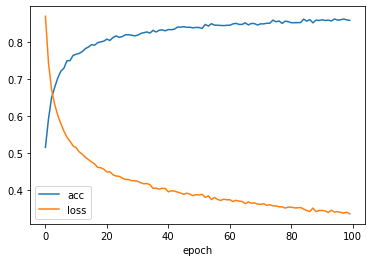

In [4]:
nn.plot()

In [9]:
# とりあえず決め打ち
optimized_params = {
    'patience': 30,
    'layers': 8,
    'dropout': 0.1,
    'units': 100,
    'nb_epoch': 1000,
    'batch_size': 256
}
nn = models.NN(optimized_params)
print(cross_validation_score(nn, X_train, y_train))
print(optimized_params)
with open('./config/NN-deep.json', 'w') as f:
    json.dump(optimized_params, f)


2022-02-19 14:21:22.759813: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-02-19 14:29:11.186030: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-02-19 14:29:13.598560: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-02-19 14:38:13.296307: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-02-19 14:38:19.605740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-02-19 14:46:15.624204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-02-19 14:46:18.055222: I tensorflow/core/grappler/optimizers/cust

0.8696078431372549
{'patience': 30, 'layers': 8, 'dropout': 0.1, 'units': 100, 'nb_epoch': 1000, 'batch_size': 256}


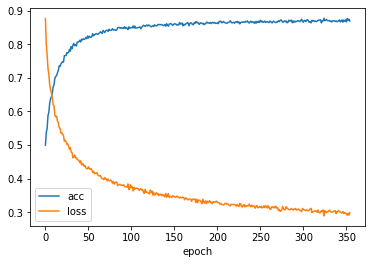

In [10]:
nn.plot()